### 넘파이의 이해

- 넘파이와 리스트의 차이
- 리스트: 길이와 형식의 구별없이 데이터를 한 개의 변수에 할당 가능한 자료 구조
- array(배열): 길이와 형식이 일치하는 자료셋
    - npy, npz 저장가능
    - npz로 저장된 자료는 서로다른 array를 저장하는 구조
    - npz로 저장된 자료는 list(np.load)로서 확인
    
    
numpy array
broadcasting, 뭐 기타 등...

In [11]:
!pip install numpy

In [6]:
import numpy as np

a = np.array([1, 2, 3, 4])
a

array([1, 2, 3, 4])

In [7]:
a = [
    [[[255, 0, 0], [0, 255, 0], [0, 255, 255]],
    [[0, 0, 0], [0, 0, 255], [0, 255, 0]]],
    
    [[[255, 255, 255], [255, 0, 0], [0, 255, 255]],
    [[0, 0, 0], [0, 0, 255], [255, 255, 255]]]
]

# array와 list 구조의 차이
# type(a), np.shape(a)
np.array(a)

array([[[[255,   0,   0],
         [  0, 255,   0],
         [  0, 255, 255]],

        [[  0,   0,   0],
         [  0,   0, 255],
         [  0, 255,   0]]],


       [[[255, 255, 255],
         [255,   0,   0],
         [  0, 255, 255]],

        [[  0,   0,   0],
         [  0,   0, 255],
         [255, 255, 255]]]])

In [23]:
!pip install matplotlib

In [8]:
import matplotlib.pyplot as plt

# 이미지 데이터
a = [
    [[[255, 0, 0], [0, 255, 0], [0, 255, 255]],
    [[0, 0, 0], [0, 0, 255], [0, 255, 0]]],
    
    [[[255, 255, 255], [255, 0, 0], [0, 255, 255]],
    [[0, 0, 0], [0, 0, 255], [255, 255, 255]]]
]

# 레이블 데이터
# 1 강아지 0 고양이
b = [1, 0]

# 구글검색 npz 저장
np.savez('test.npz', x=a, y=b)

# plt.imshow(a[1])

In [2]:
!pip install tensorflow-cpu

In [9]:
data = np.load('test.npz')
list(data)
Xdata, Ydata = data['x'], data['y']

In [10]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist
tmp = mnist.load_data()

In [11]:
# np.shape(tmp)

x_train, y_train = tmp[0]
x_test, y_test = tmp[1]
np.shape(x_train), np.shape(y_train)

((60000, 28, 28), (60000,))

In [12]:
# 어디에서 어디까지 공부했는지 알아야댐 0 ~ 255까지
x_train[0].min(), x_train[1].max()

(0, 255)

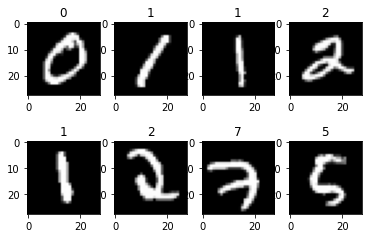

In [13]:
numList = [1, 3, 8, 5, 200, 400, 5000, 2000]

for cnt, num in enumerate(numList):
    # subplot(행 개수, 행 별 데이터 개수, 위치)
    plt.subplot(2, len(numList) // 2, cnt + 1)
    plt.imshow(x_train[num], cmap='gray')
    plt.title(y_train[num])

In [148]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [149]:
model.fit(x_train, y_train, epochs=1)

model.evaluate(x_test,  y_test, verbose=2)

1875/1875 [==============================] - 3s 1ms/step - loss: 2.5249 - accuracy: 0.7551
313/313 - 1s - loss: 0.5373 - accuracy: 0.8647 - 707ms/epoch - 2ms/step


[0.5372630953788757, 0.8647000193595886]

type(model.get_config())
np.shape(model.weights[0]) # 784, 128
np.shape(model.weights[0][0]) 
np.shape(model.weights[1]) # bias의 갯수

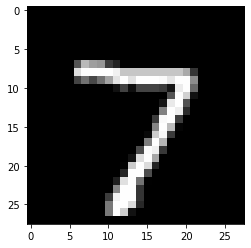

In [29]:
plt.imshow(x_test[0], cmap='gray')

In [151]:
pr = model.predict(x_test[:3])
np.argmax(pr[1]), y_test[1]

1/1 [==============================] - 0s 19ms/step


(2, 2)

In [55]:
# 학습 데이터와 테스트 데이터의 shape(dimension)을 맞춰줘야됨
print(np.shape(x_test[0]), np.shape(x_test[:3]))
np.shape(x_test[0].reshape(1, 28, 28))

(28, 28) (3, 28, 28)


(1, 28, 28)

In [56]:
np.argmax(model.predict(x_test[0].reshape(1, 28, 28)))

1/1 [==============================] - 0s 16ms/step


7

## Numpy

### np.reshape

In [57]:
a = np.arange(15)
print(a)
np.shape(a)
b = np.arange(15).reshape(15, 1)
b

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]


array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14]])

In [62]:
# List를 reshape하는 방법
x = [1, 2, 3, 3, 3, 3, 4, 4, 5, 6, 6]
np.reshape(x, (11, 1))

array([[1],
       [2],
       [3],
       [3],
       [3],
       [3],
       [4],
       [4],
       [5],
       [6],
       [6]])

In [73]:
# reshape를 안 했을때 생기는 문제점
x = [[1, 20], [1, 15], [2, 30]]
w = np.array([1, 1])
y = np.array([[20], [15], [25]]) # 2차원
y_hat = np.sum(x * w, axis=1) # 1차원
# y, y_hat, y - y_hat # 결과 이상해짐
# 아래 두개는 같은 결과
# np.sum(x * w, axis=1), np.dot(x, w)

y.shape, y_hat.shape
y - y_hat.reshape(3, 1)

array([[-1],
       [-1],
       [-7]])

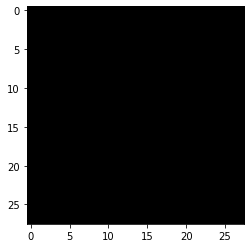

In [82]:
# np.zeros
tmp = np.zeros((28, 28))
plt.imshow(tmp, cmap='gray')

(0.0, 1.0)

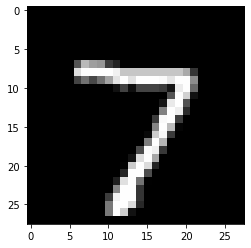

In [88]:
# scaling
def a(x):
    plt.imshow(x, cmap='gray')
    
tmp = x_test[0] / 255
a(tmp)
tmp.min(), tmp.max()

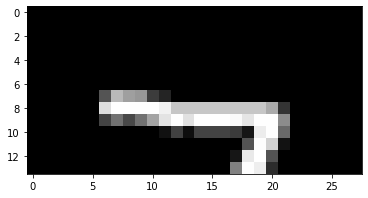

In [94]:
a(x_test[0][:14, :])

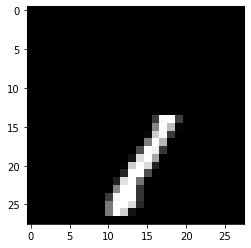

In [99]:
tmp = np.zeros((14, 28))
x_test[0][:14, :] = x_test[0][:14, :] * tmp
a(x_test[0][...]) # 같음 a(x_test[0][:, :]) 모든 행, 모든 열

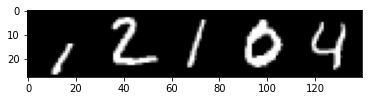

In [104]:
# np,hstack, np.vstack
# h: horizontal
# v: vertical 

tmp = np.hstack(x_test[:5])
# tmp = np.vstack(x_test[:5])
np.shape(tmp)
a(tmp)

In [108]:
# 열 추가(1이 추가되는 위치)
from numpy import newaxis

a = np.array([4., 2.])
print(np.shape(a))
a = a[:, newaxis]
b = a[newaxis, ...]
print(np.shape(a))
print(np.shape(b))

(2,)
(2, 1)
(1, 2, 1)


In [109]:
x_test[0].reshape(1, 28, 28)
x_test[0][newaxis, ...]

array([[[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0

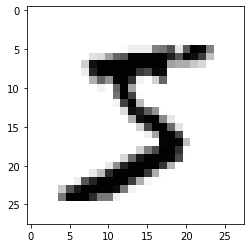

In [113]:
# 손글씨 인식 모델은 
# 28, 28의 흑백 이미지의 손글씨를 인식
# 숫자범위는 0 ~ 255
# 사이즈는 28, 28
# 배경은 검정색, 글씨는 흰색

# 흰색 검은색 바꾸기
tmp = 255 - x_train[0]
np.shape(tmp)
plt.imshow(tmp, cmap='gray')

In [114]:
!pip install PILLOW

(28, 28)
0.0 0.9215686274509803
1/1 [==============================] - 0s 18ms/step


8

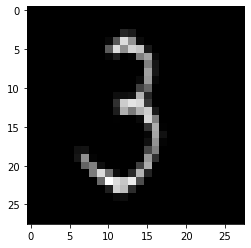

In [162]:
from PIL import Image

img = Image.open('num.jpg').convert('L')
img = img.resize((28, 28))
# 255 - 하는 이유는 훈련데이터는 검정색 배경, 흰색 글자,
# 내가만든 사진은 흰색배경, 검정글자여서 흰색, 검정색 반전용
# 이 자료는 233인가가 제일 큰값이라서 255- 대신
# np.array(img).max() - 해도 됨
arr = (255 - np.array(img)) / 255.
print(np.shape(img))
plt.imshow(arr, cmap='gray')
print(arr.min(), arr.max())

pr = model.predict(arr.reshape(-1, 28, 28))
np.argmax(pr)

## 지금까지

- 배열 array의 이해
- 배열구조변경(reshape, newaxis, flatten)
- 확장(expand), 행, 열 연결(vstack, hstack)

## Numpy 브로드캐스팅

In [172]:
x = [[1, 20], [2, 15], [1, 20]]
# 행렬 내적 곱
w = np.array([[[3]]])
np.sum(x * w, axis=1)

array([[ 12, 165]])

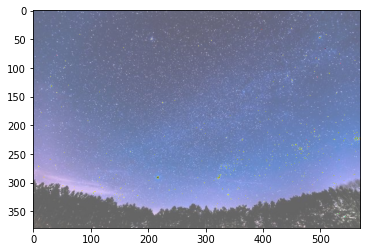

In [198]:
img1 = Image.open('sky1.jpg')
img1.size # 열너비 570, 행높이 379 (570, 379)
# np.shape(img1) # img.size와 반대로 나옴
img1 = np.array(img1)

# plt.imshow(img1 * [1, 0, 0]) # 빨간색만 남김
# plt.imshow(img1 * [0, 1, 0]) # 초록색만 남김
# plt.imshow(img1 * [0, 0, 1]) # 파란색만 남김
plt.imshow(img1 + 100) #어두운 사진을 밝게

In [191]:
# 사진의 평균 밝기 확인 0에 가까울수록 어두운 사진
# np.mean 평균, np.std 편차
np.mean(img1), np.std(img1)

(34.788685213473435, 34.39067022380647)

In [192]:
img2 = Image.open('sky2.jpg')
print(img2.size)
img2 = np.array(img2)
np.mean(img2), np.std(img2)

(1300, 876)


(216.13288871326543, 35.37742208999331)

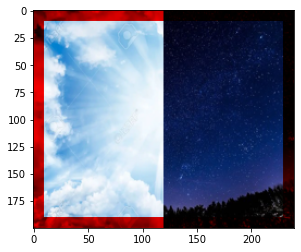

In [227]:
img1 = Image.open('sky1.jpg')
img1 = img1.resize((240, 200))
img1 = np.array(img1)

img2 = Image.open('sky2.jpg')
img2 = img2.resize((240, 200))
img2 = np.array(img2)

img1[:, :120] = img2[:, :120]

img1[:10, :] = img1[:10, :] * [1, 0 ,0]
img1[-10:, :] = img1[-10:, :] * [1, 0 ,0]
img1[:, :10] = img1[:, :10] * [1, 0 ,0]
img1[:, -10:] = img1[:, -10:] * [1, 0 ,0]

plt.imshow(img1)

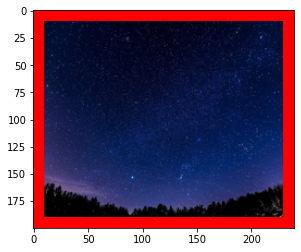

In [242]:
img1 = Image.open('sky1.jpg')
img1 = img1.resize((240, 200))
img1 = np.array(img1)

back = np.zeros((200, 240, 3), dtype=np.int16)
back[...] = [255, 0, 0]
back[10:-10, 10:-10] = img1[10:-10, 10:-10]

plt.imshow(back)

## 내일 일정

- 오전 9시 ~ 10시: 오늘한 작업에 대한 미션
- 내일강의 중점: 머신러닝에서 필요한 기술통계